# Author: Michael Wood
## Project 6, Problem 1 (Python)

In this problem, we will perform more data analyses on the adult_training dataset that was used previously: https://github.com/bforoura/IDS/blob/main/decision_trees.ipynb

1. Write four functions to create classification models, record classification accuracy, and plot results. You will need to demonstrate your functions using the following calls (feel free to add extra formal function parameters, as necessary):

        a. cart_classifier = makeDTModel("gini", X_train, y_train)
           c5_classifier = makeDTModel("entropy", X_train, y_train)
        b. # display text and graphic representation of a tree classifier
           displayTree(cart_classifier, X)
           displayTree(c5_classifier, X)
        c. # display text and heatmap of a confusion matrix
           displayCM(cart_classifier, X_train, y_train, X_test, y_test)
           displayCM(c5_classifier, X_train, y_train, X_test, y_test)
        d. # create and display plots of side-by-side model comparisons
           compareModels(cart_classifier, c5_classifier)

2. Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).

3. Summarize your findings.

In [ ]:
# Import and display the data

import pandas as pd
import numpy as np

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

adultDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [ ]:
# Displaying information about DF

adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [ ]:
# Fix noise and any missing data

# Replace possible error values in necessary columns with NaN
adultDF['capital-gain'] = adultDF['capital-gain'].replace(0, np.nan)
adultDF['capital-gain'] = adultDF['capital-gain'].replace(99999, np.nan)
adultDF['capital-loss'] = adultDF['capital-loss'].replace(0, np.nan)

# Impute the missing data with the column average
adultDF['capital-gain'].fillna(adultDF['capital-gain'].mean(), inplace=True)
adultDF['capital-loss'].fillna(adultDF['capital-loss'].mean(), inplace=True)

# Display new DF information
adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,7637.383491,1877.836676
std,13.678875,2.598297,1600.365217,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,7637.383491,1877.836676
50%,37.000000,10.000000,7637.383491,1877.836676
75%,48.000000,12.000000,7637.383491,1877.836676
max,90.000000,16.000000,41310.000000,4356.000000


In [ ]:
# This code is mostly taken from decision_trees.ipynb file in the class IDS repository.

# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,Married-civ-spouse,9515.220167,<=50K
1,Divorced,9515.220167,<=50K
2,Married-spouse-absent,9515.220167,<=50K
3,Married-civ-spouse,9515.220167,>50K
4,Never-married,15961.836676,>50K
5,Married-civ-spouse,9515.220167,>50K
6,Married-civ-spouse,9515.220167,<=50K
7,Married-civ-spouse,9679.383491,<=50K
8,Married-civ-spouse,9515.220167,>50K
9,Divorced,9515.220167,<=50K


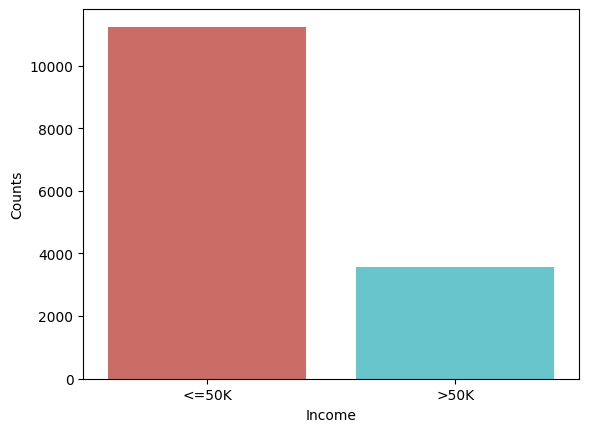

In [ ]:
# This code is mostly taken from decision_trees.ipynb file in the class IDS repository.

# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

In [ ]:
# This code is mostly taken from decision_trees.ipynb file in the class IDS repository.

# Encode the categorical values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]

encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,9515.220167,0
1,0,9515.220167,0
2,3,9515.220167,0
3,2,9515.220167,1
4,4,15961.836676,1
5,2,9515.220167,1
6,2,9515.220167,0
7,2,9679.383491,0
8,2,9515.220167,1
9,0,9515.220167,0


In [ ]:
# This code is mostly taken from decision_trees.ipynb file in the class IDS repository.

# Train/Test Split

from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']

# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (11837, 2)
Test size: (2960, 2)


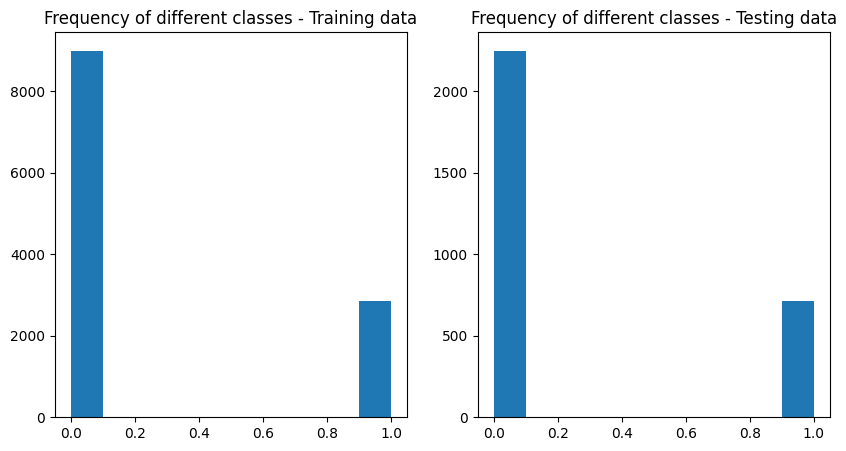

In [ ]:
# This code is mostly taken from decision_trees.ipynb file in the class IDS repository.

# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

In [ ]:
# 1. All of the necessary functions to create classification models, record classification accuracy, and plot results.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Function to create the DT Model
def makeDTModel(crit, x_train, y_train, mln, md):
  # Added parameters of max_depth, and max_leaf_nodes
  DTModel = DecisionTreeClassifier(criterion = crit, max_depth=md, max_leaf_nodes = mln, random_state = 53)
  DTModel.fit(x_train, y_train)
  return DTModel

# Function to display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  # Display the text representation of the tree
  text_representation = tree.export_text(classifier)
  print("Text Representation of the Tree:")
  print(text_representation)

  # Display the graphic representation of the tree
  plt.figure(figsize=(10, 8))
  tree.plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], rounded=True)
  plt.show()

# Function to display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  y_pred = classifier.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(10, 8))

  sns.heatmap(cm, annot=True, fmt='d')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')
  plt.show()

# Function to create and display plots of side-by-side model comparisons
def compareModels(model1, model2):
  # Record the cart accuracy
  score1 = round(cart_classifier.score(X_train, y_train), 2)
  score2 = round(cart_classifier.score(X_test, y_test), 2)

  # Record the C5 accuracy
  score3 = round(c5_classifier.score(X_train, y_train), 2)
  score4 = round(c5_classifier.score(X_test, y_test), 2)
  labels = ['CART', 'C5.0']

  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)
  width = 0.4

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='green')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper left')

  plt.title('Model Comparisons')
  plt.figure(figsize=(10, 8))
  plt.show()

In [ ]:
# 1a. Cart Classifiers
# 2. Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy.

# Create DT  classifiers with max leaf nodes as 5 and max depth as 3
cart_classifier = makeDTModel("gini", X_train, y_train, 5, 3)
c5_classifier = makeDTModel("entropy", X_train, y_train, 5, 3)

# Create DT  classifiers with max leaf nodes as 4 and max depth as 2
cart_classifier2 = makeDTModel("gini", X_train, y_train, 4, 2)
c5_classifier2 = makeDTModel("entropy", X_train, y_train, 4, 2)

# Create DT  classifiers with max leaf nodes as 3 and max depth as 4
cart_classifier3 = makeDTModel("gini", X_train, y_train, 3, 4)
c5_classifier3 = makeDTModel("entropy", X_train, y_train, 3, 4)

# Create DT  classifiers with max leaf nodes as 6 and max depth as 4
cart_classifier4 = makeDTModel("gini", X_train, y_train, 6, 4)
c5_classifier4 = makeDTModel("entropy", X_train, y_train, 6, 4)

Text and graphic representation of the classifier with max leaf nodes of 5 and a max depth of 3:
Text Representation of the Tree:
|--- feature_1 <= 9519.80
|   |--- feature_0 <= 2.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- class: 0
|--- feature_1 >  9519.80
|   |--- feature_0 <= 2.50
|   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- class: 1



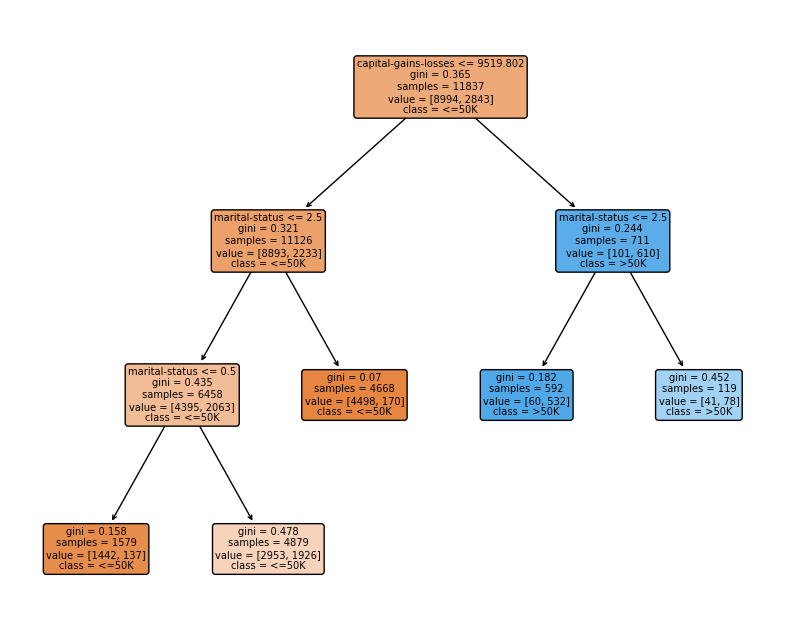

Text Representation of the Tree:
|--- feature_0 <= 2.50
|   |--- feature_1 <= 9519.80
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  9519.80
|   |   |--- class: 1
|--- feature_0 >  2.50
|   |--- feature_1 <= 10028.88
|   |   |--- class: 0
|   |--- feature_1 >  10028.88
|   |   |--- class: 1



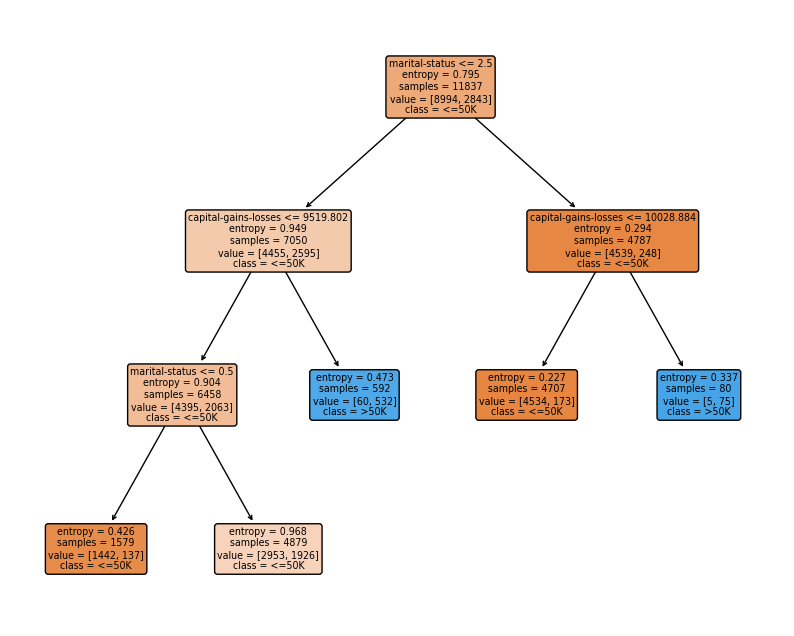


Text and graphic representation of the classifier with max leaf nodes of 4 and a max depth of 2:
Text Representation of the Tree:
|--- feature_1 <= 9519.80
|   |--- feature_0 <= 2.50
|   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- class: 0
|--- feature_1 >  9519.80
|   |--- feature_0 <= 2.50
|   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- class: 1



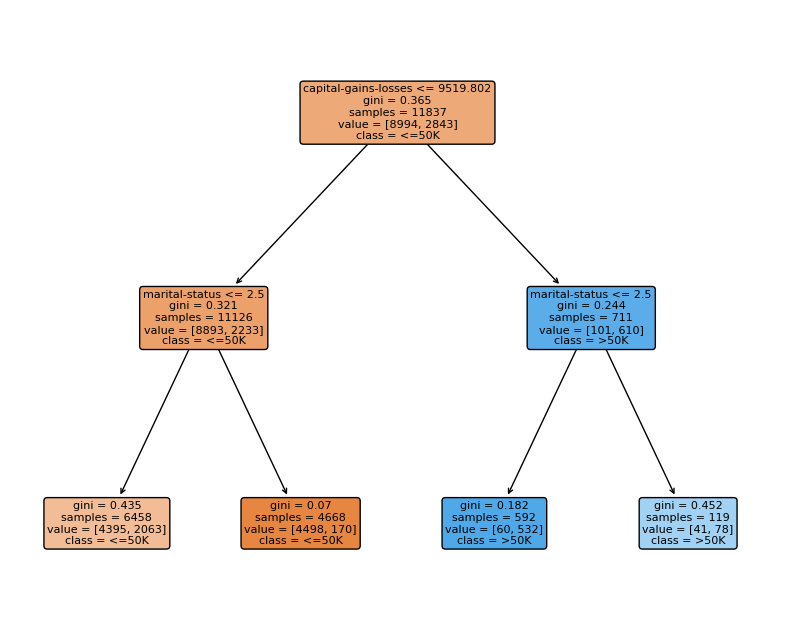

Text Representation of the Tree:
|--- feature_0 <= 2.50
|   |--- feature_1 <= 9519.80
|   |   |--- class: 0
|   |--- feature_1 >  9519.80
|   |   |--- class: 1
|--- feature_0 >  2.50
|   |--- feature_1 <= 10028.88
|   |   |--- class: 0
|   |--- feature_1 >  10028.88
|   |   |--- class: 1



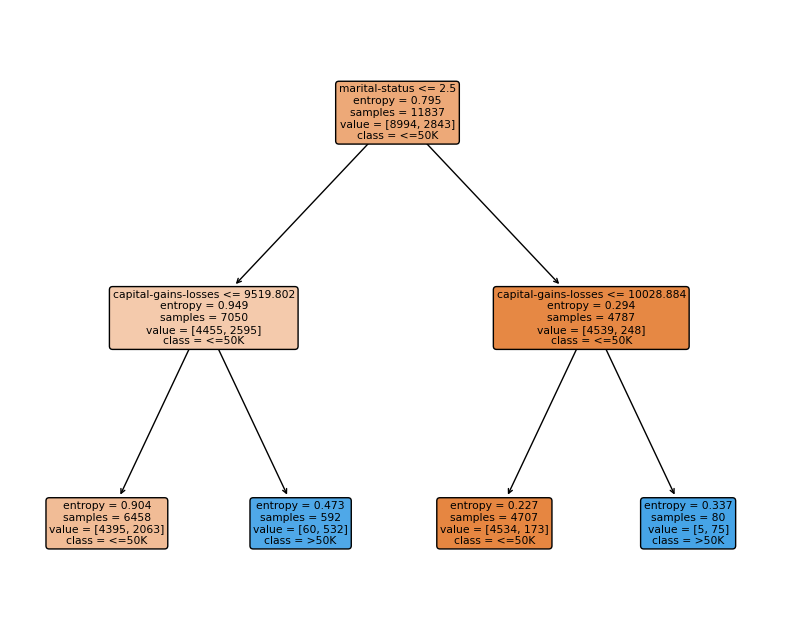


Text and graphic representation of the classifier with max leaf nodes of 3 and a max depth of 4:
Text Representation of the Tree:
|--- feature_1 <= 9519.80
|   |--- feature_0 <= 2.50
|   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- class: 0
|--- feature_1 >  9519.80
|   |--- class: 1



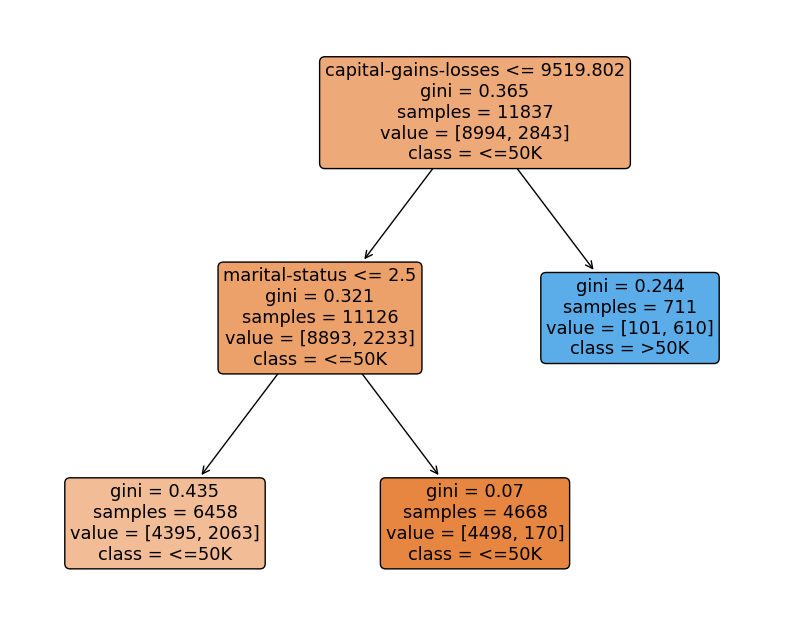

Text Representation of the Tree:
|--- feature_0 <= 2.50
|   |--- feature_1 <= 9519.80
|   |   |--- class: 0
|   |--- feature_1 >  9519.80
|   |   |--- class: 1
|--- feature_0 >  2.50
|   |--- class: 0



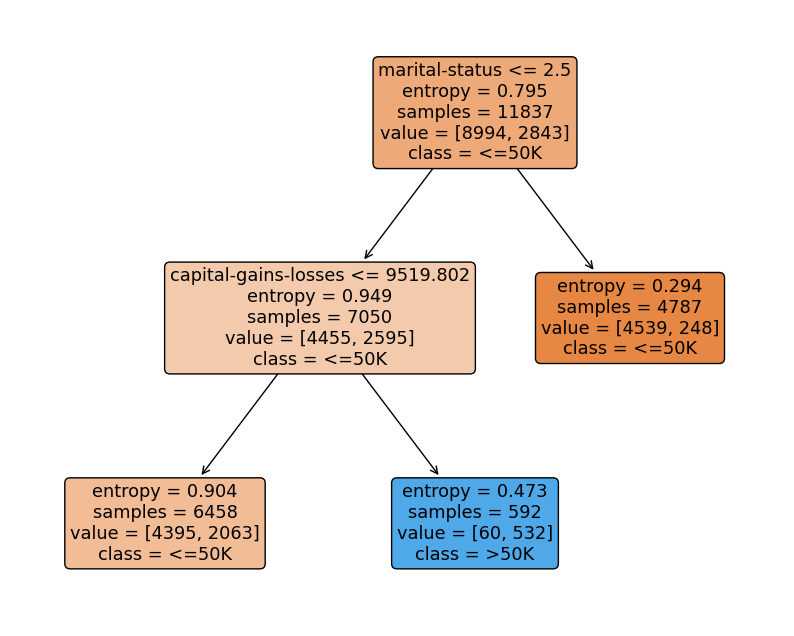


Text and graphic representation of the classifier with max leaf nodes of 6 and a max depth of 4:
Text Representation of the Tree:
|--- feature_1 <= 9519.80
|   |--- feature_0 <= 2.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_1 <= 6973.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  6973.34
|   |   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- class: 0
|--- feature_1 >  9519.80
|   |--- feature_0 <= 2.50
|   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- class: 1



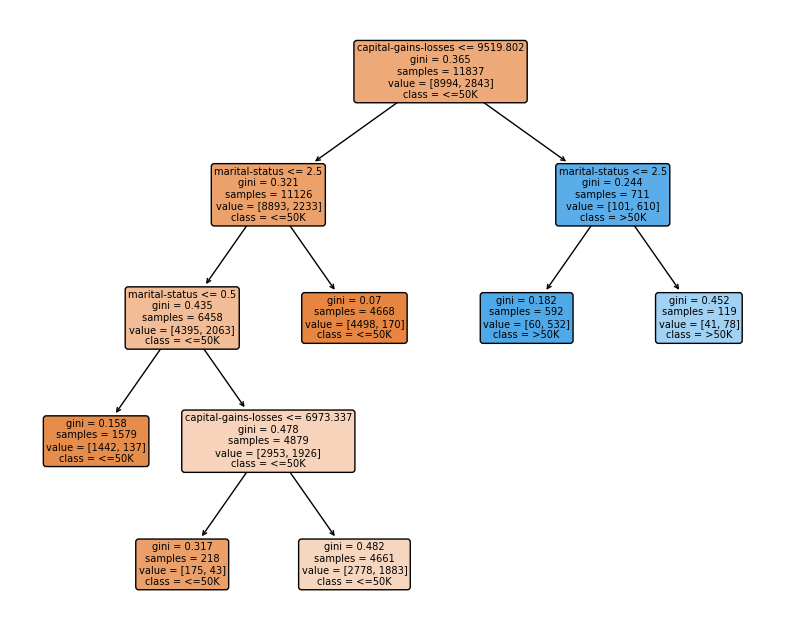

Text Representation of the Tree:
|--- feature_0 <= 2.50
|   |--- feature_1 <= 9519.80
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  9519.80
|   |   |--- feature_1 <= 9615.88
|   |   |   |--- class: 1
|   |   |--- feature_1 >  9615.88
|   |   |   |--- class: 1
|--- feature_0 >  2.50
|   |--- feature_1 <= 10028.88
|   |   |--- class: 0
|   |--- feature_1 >  10028.88
|   |   |--- class: 1



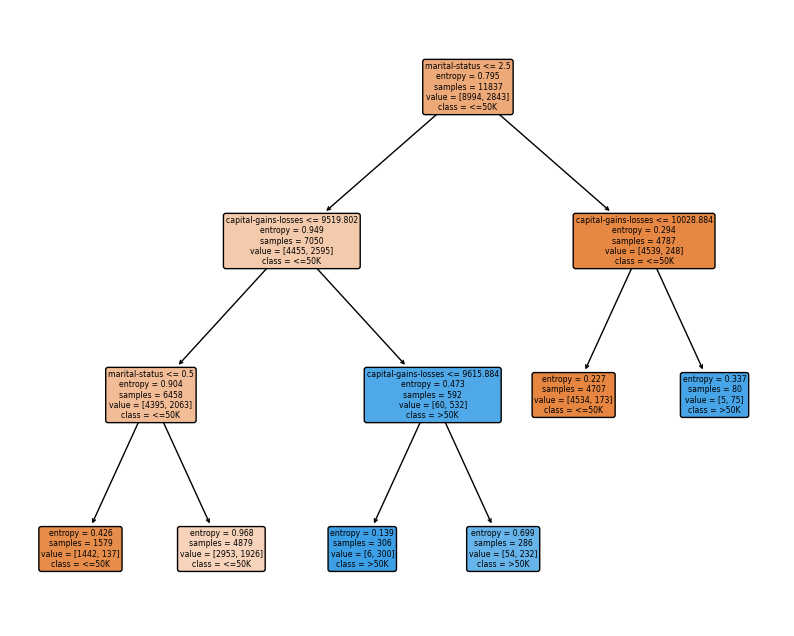

In [ ]:
# 1b. Tree Classifiers

# Display the Tree Classifiers
print("Text and graphic representation of the classifier with max leaf nodes of 5 and a max depth of 3:")
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

print("\nText and graphic representation of the classifier with max leaf nodes of 4 and a max depth of 2:")
displayTree(cart_classifier2, X)
displayTree(c5_classifier2, X)

print("\nText and graphic representation of the classifier with max leaf nodes of 3 and a max depth of 4:")
displayTree(cart_classifier3, X)
displayTree(c5_classifier3, X)

print("\nText and graphic representation of the classifier with max leaf nodes of 6 and a max depth of 4:")
displayTree(cart_classifier4, X)
displayTree(c5_classifier4, X)


Text and heatmap of a confusion matrix with max leaf nodes of 5 and a max depth of 3:


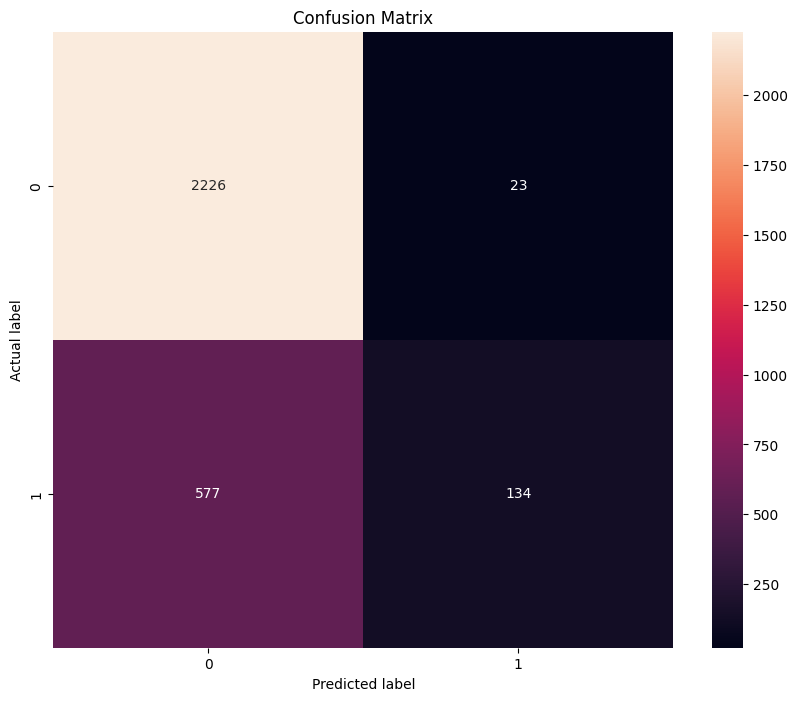

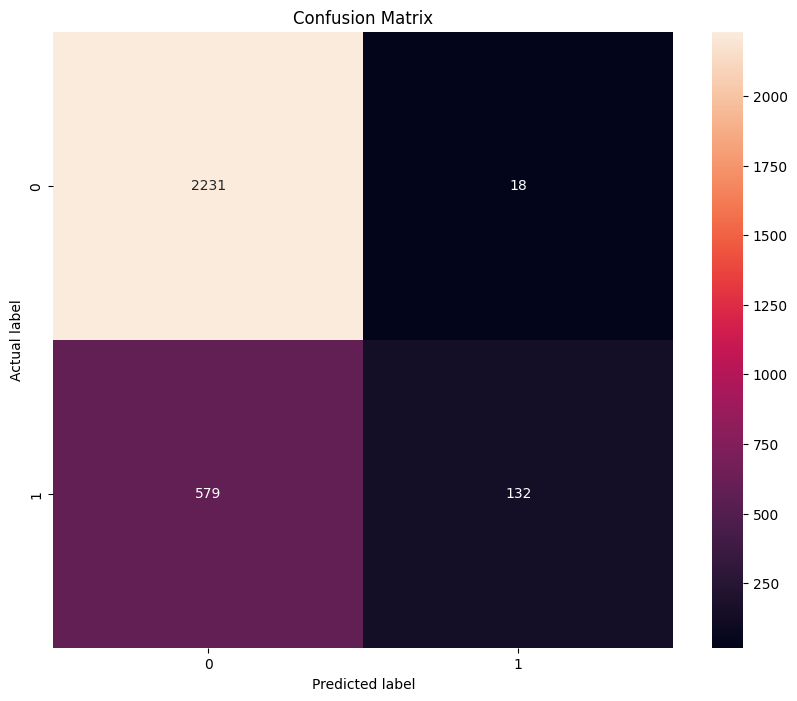


Text and heatmap of a confusion matrix with max leaf nodes of 4 and a max depth of 2:


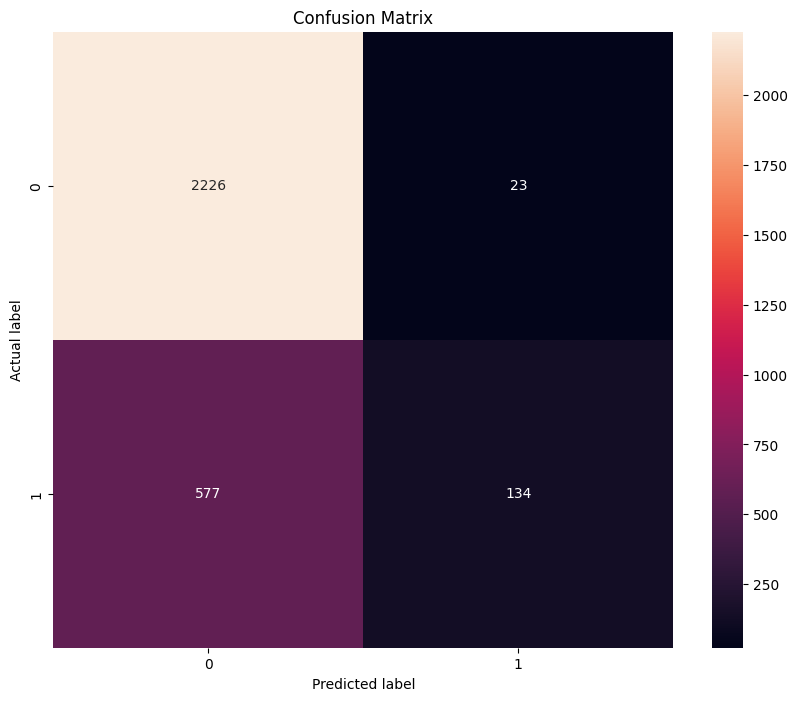

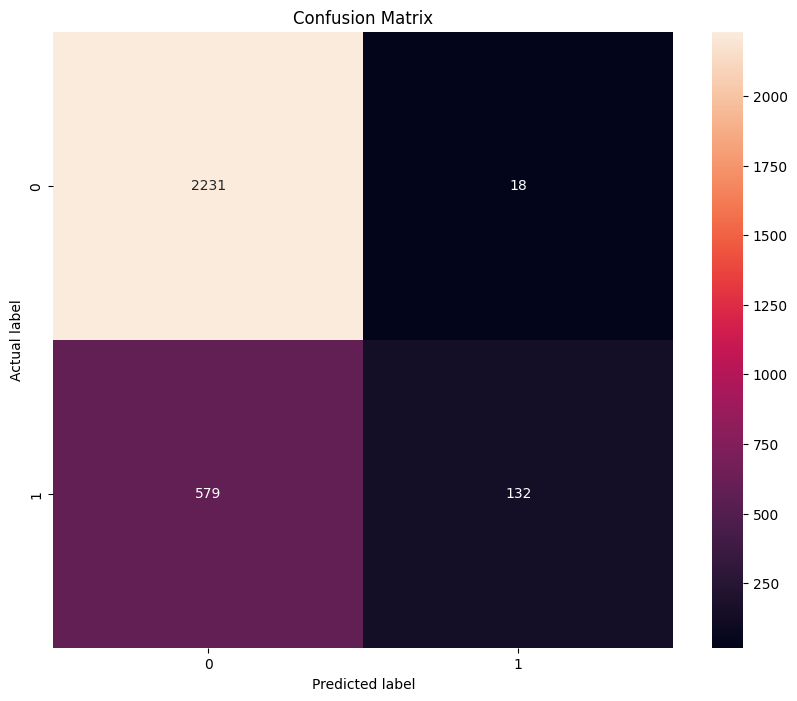


Text and heatmap of a confusion matrix with max leaf nodes of 3 and a max depth of 4:


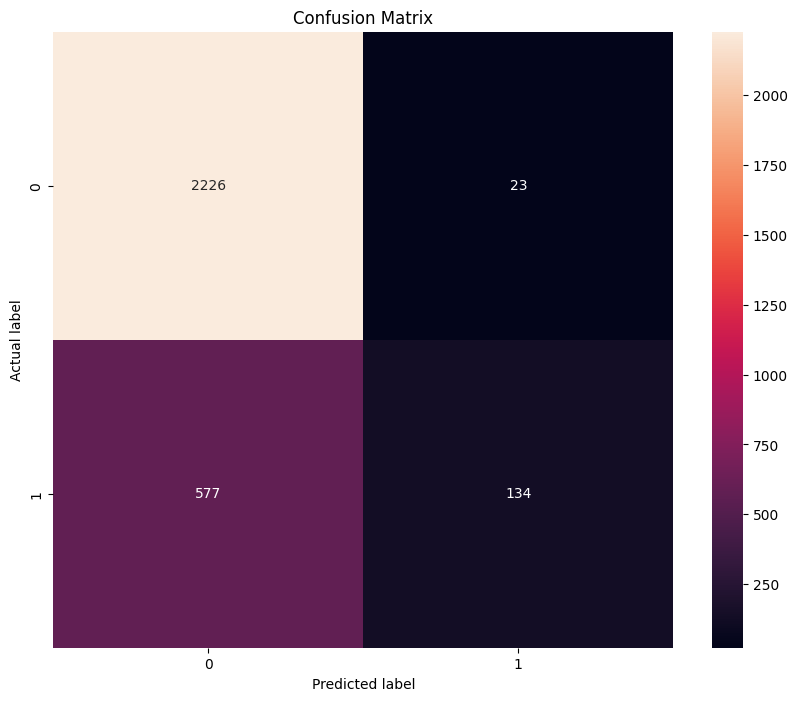

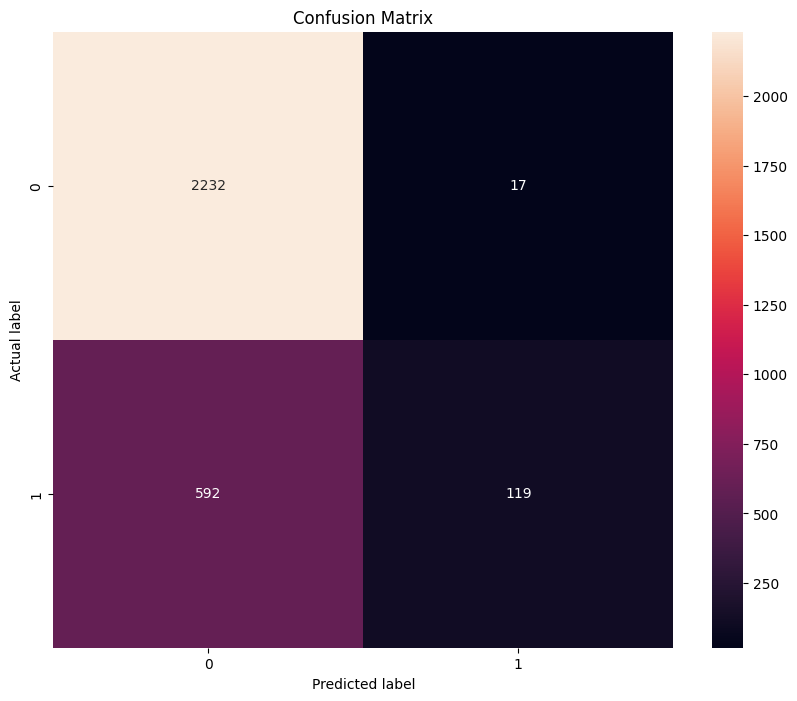


Text and heatmap of a confusion matrix with max leaf nodes of 6 and a max depth of 6:


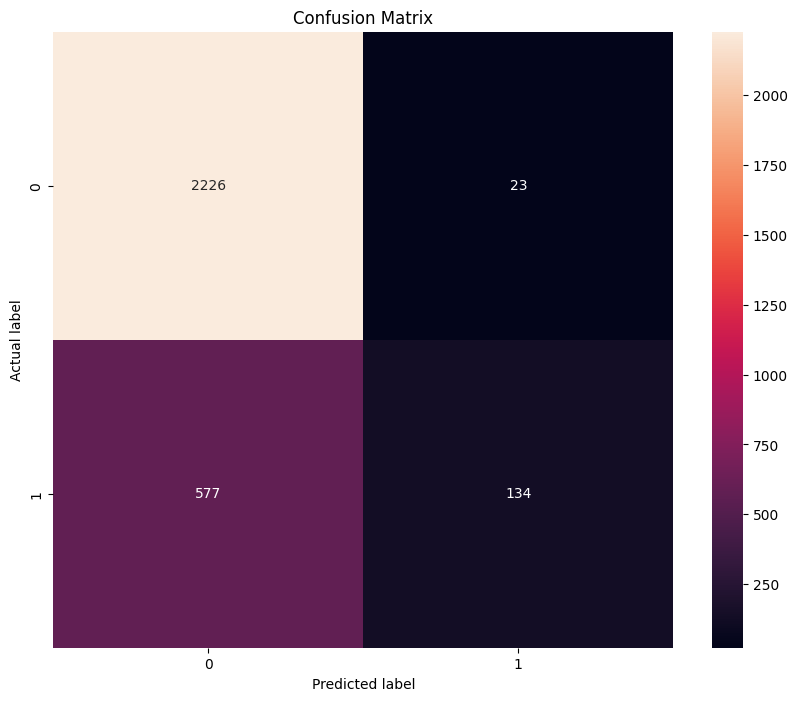

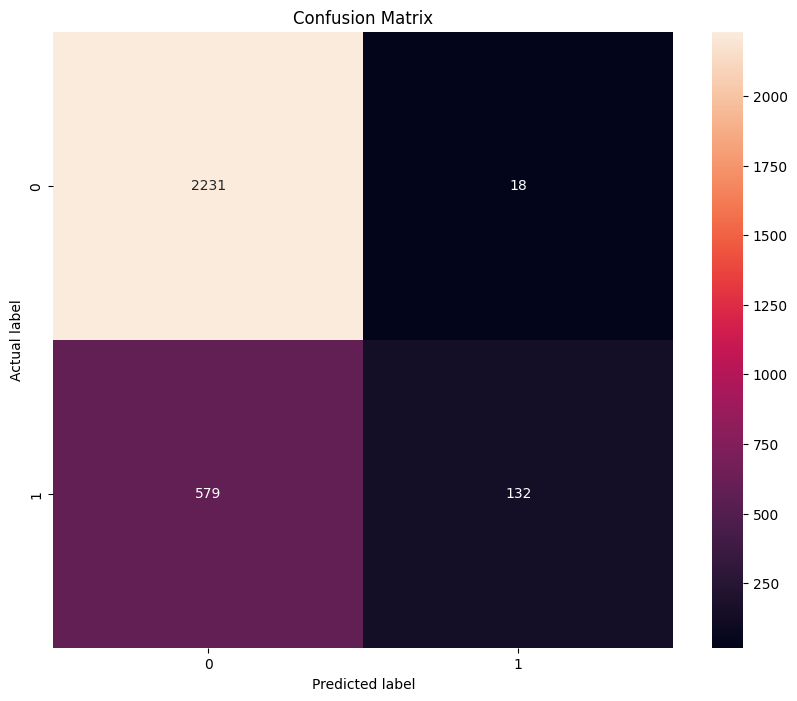

In [ ]:
# 1c. Confusion Matrix Model

# Display the Confusion Matrix Model
print("\nText and heatmap of a confusion matrix with max leaf nodes of 5 and a max depth of 3:")
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

print("\nText and heatmap of a confusion matrix with max leaf nodes of 4 and a max depth of 2:")
displayCM(cart_classifier2, X_train, y_train, X_test, y_test)
displayCM(c5_classifier2, X_train, y_train, X_test, y_test)

print("\nText and heatmap of a confusion matrix with max leaf nodes of 3 and a max depth of 4:")
displayCM(cart_classifier3, X_train, y_train, X_test, y_test)
displayCM(c5_classifier3, X_train, y_train, X_test, y_test)

print("\nText and heatmap of a confusion matrix with max leaf nodes of 6 and a max depth of 6:")
displayCM(cart_classifier4, X_train, y_train, X_test, y_test)
displayCM(c5_classifier4, X_train, y_train, X_test, y_test)


Create and display plots of side-by-side model comparisons with max leaf nodes of 5 and a max depth of 3:


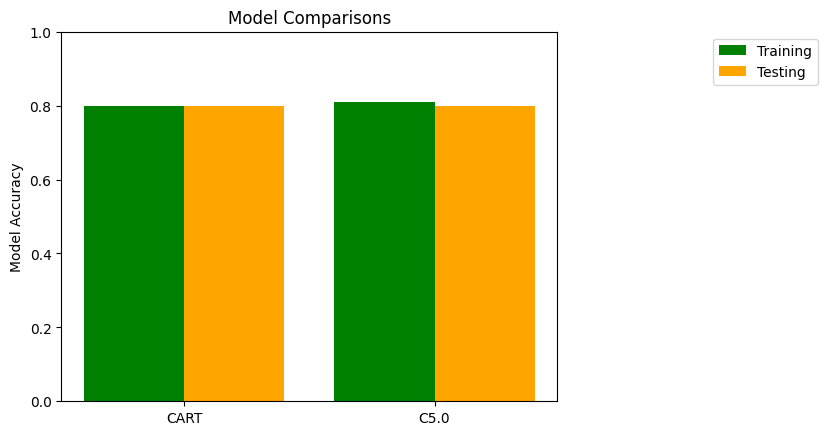

<Figure size 1000x800 with 0 Axes>


Create and display plots of side-by-side model comparisons with max leaf nodes of 4 and a max depth of 2:


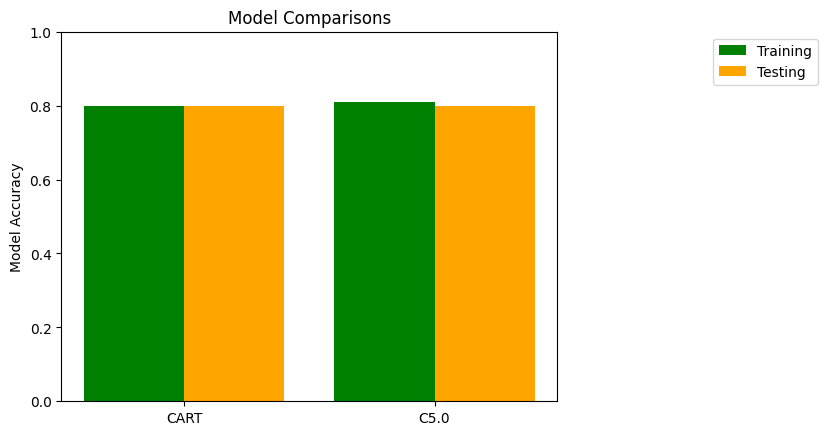

<Figure size 1000x800 with 0 Axes>


Create and display plots of side-by-side model comparisons with max leaf nodes of 3 and a max depth of 4:


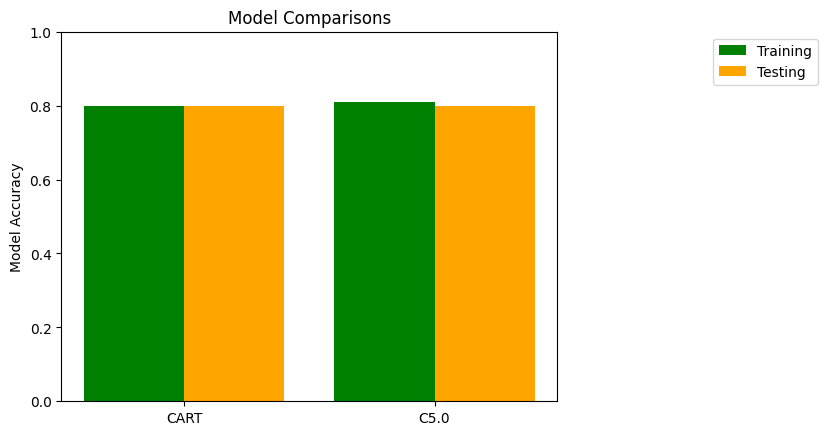

<Figure size 1000x800 with 0 Axes>


Create and display plots of side-by-side model comparisons with max leaf nodes of 6 and a max depth of 4:


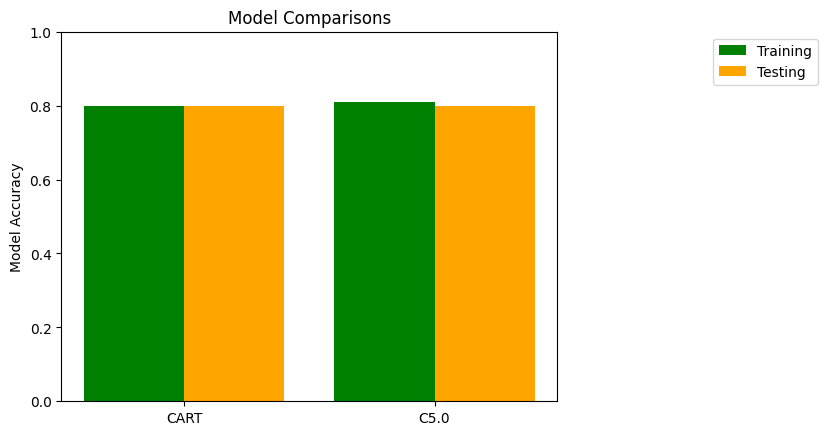

<Figure size 1000x800 with 0 Axes>

In [ ]:
# 1d. Side-by-side Model Comparisons

# create and display plots of side-by-side model comparison
print("\nCreate and display plots of side-by-side model comparisons with max leaf nodes of 5 and a max depth of 3:")
compareModels(cart_classifier, c5_classifier)

print("\nCreate and display plots of side-by-side model comparisons with max leaf nodes of 4 and a max depth of 2:")
compareModels(cart_classifier2, c5_classifier2)

print("\nCreate and display plots of side-by-side model comparisons with max leaf nodes of 3 and a max depth of 4:")
compareModels(cart_classifier3, c5_classifier3)

print("\nCreate and display plots of side-by-side model comparisons with max leaf nodes of 6 and a max depth of 4:")
compareModels(cart_classifier4, c5_classifier4)

---
## 3. Summarize your findings.
---
I first imported the dataset from the given url. Then, I analyzed and cleansed the data of any noisy data and missing values. Then, I prepared the training data for various classification. In this portion, I used the code in your decision_trees.ipynb file in the IDS class repository.

1. I then created all of the necessary functions to create classification models, record classification accuracy, and plot results.

2. I made 4 instances of the classification with different max leaf nodes and max depth (individual values are defined above in the creation of the classifiers). Changing the values did not seem to have an effect on the accuracy of the classifications. Each classification had a rating of about 0.8. The valus in each confusion matrix do not seem to differ too much from one another. The decision trees did change structure depending on the variables.